# POLYNOMIAL REGRESSION

In [1]:
#importing the libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#loading the dataset

df=pd.read_csv(r"C:\Users\HP\Downloads\Position_Salaries.csv")
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


EDA PART

In [3]:
df.shape

(10, 3)

In [4]:
df.columns

Index(['Position', 'Level', 'Salary'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [6]:
df.dtypes

Position    object
Level        int64
Salary       int64
dtype: object

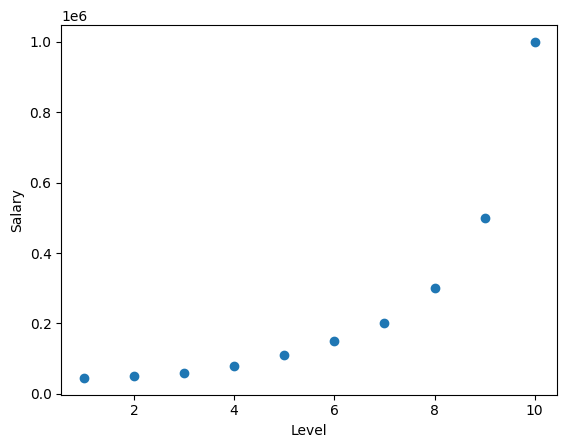

In [7]:
#data visualisation

plt.scatter(x=df['Level'],y=df['Salary'])
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

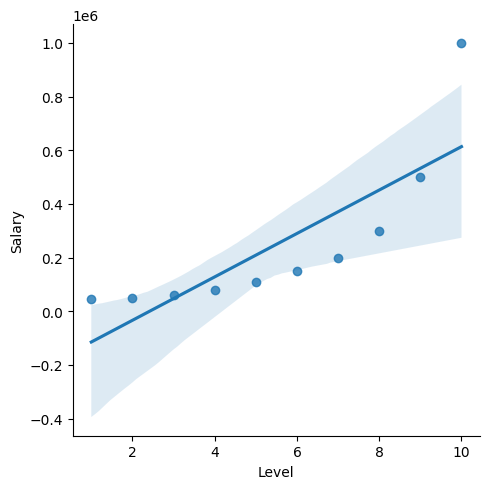

In [8]:
sns.lmplot(x='Level',y='Salary',data=df)

PREPROCESSING PART

In [9]:
#checking for null values

df.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

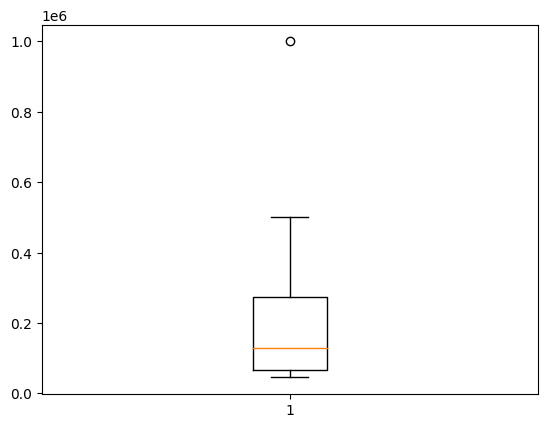

In [10]:
#checking for outliers

plt.boxplot(df['Salary'])
plt.show()

In [11]:
#classifying into dependent and independent variables

#independent
x=df[['Level']].values         
print(x)
print(x.shape)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
(10, 1)


In [12]:
#dependent
y=df[['Salary']].values
print(y)
print(y.shape)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]
(10, 1)


MODEL BUILDING

In [13]:
#importing algo linear regresssion from sklearn
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [14]:
reg.fit(x,y)

LinearRegression()

In [15]:
y_pred=reg.predict(x)
y_pred

array([[-114454.54545455],
       [ -33575.75757576],
       [  47303.03030303],
       [ 128181.81818182],
       [ 209060.60606061],
       [ 289939.39393939],
       [ 370818.18181818],
       [ 451696.96969697],
       [ 532575.75757576],
       [ 613454.54545455]])

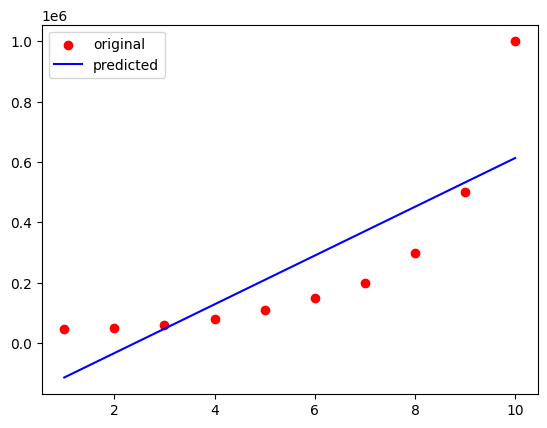

In [16]:
#linear reg data visualisation
plt.scatter(x,y,color="r",label="original")
plt.plot(x,y_pred,color="b",label="predicted")
plt.legend()
plt.show()

In [17]:
# importing the polynomial regression algorithm from sklearn
from sklearn.preprocessing import PolynomialFeatures

In [18]:
poly=PolynomialFeatures(degree=3)
x_poly=poly.fit_transform(x)

In [19]:
reg2=LinearRegression()

In [20]:
reg2.fit(x_poly,y)

LinearRegression()

In [21]:
y_pred_poly=reg2.predict(x_poly)
y_pred_poly

array([[ 14902.09790211],
       [ 78759.90675991],
       [ 94960.37296038],
       [ 88223.77622378],
       [ 83270.3962704 ],
       [104820.51282052],
       [177594.40559441],
       [326312.35431235],
       [575694.63869463],
       [950461.53846152]])

VISUALISATION OF LINEAR VS POLYNOMIAL REGRESSION ALGO ON DATASET

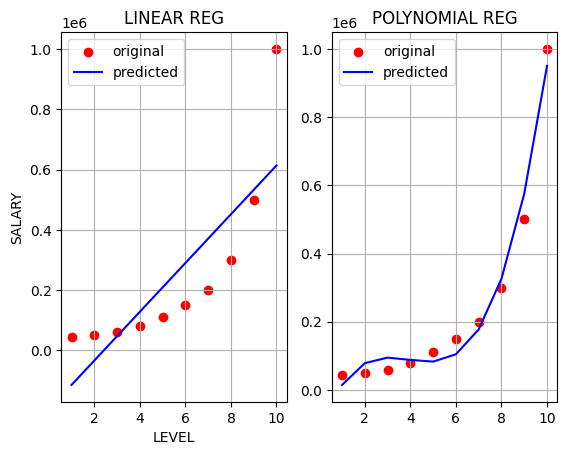

In [22]:
plt.subplot(1,2,1)
plt.scatter(x,y,color='r',label='original')
plt.plot(x,y_pred,color='b',label='predicted')
plt.legend()
plt.grid()
plt.xlabel('LEVEL')
plt.ylabel('SALARY')
plt.title('LINEAR REG')

plt.subplot(1,2,2)
plt.scatter(x,y,color='r',label='original')
plt.plot(x,y_pred_poly,color='b',label='predicted')
plt.legend()
plt.grid()
plt.title('POLYNOMIAL REG')


plt.show()

In [23]:
# Predicting a new result with Linear Regression
reg.predict([[5.5]])

array([[249500.]])

In [24]:
# Predicting a new result with Polynomial Regression
reg2.predict(poly.fit_transform([[5.5]]))

array([[89187.5]])

In [25]:
# checking the accuracy of polynomial regression algorithm
reg2.score(x_poly,y)

0.9812097727913366

In [26]:
# checking the accuracy of linear regression algorithm
reg.score(x,y)

0.6690412331929895

In [27]:
# r2 score of poly reg
from sklearn.metrics import r2_score
score=r2_score(y,y_pred_poly)
score

0.9812097727913366

In [28]:
# r2 score of lin reg
from sklearn.metrics import r2_score
score=r2_score(y,y_pred)
score

0.6690412331929895

The conclusion is that the polynomial regression algorithm gives better accuracy than linear regression algorithm